In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import kagglehub
import shutil
import os
from collections import Counter

In [16]:
# Download file by kaggle.
CSV_FILE_NAME = "training.1600000.processed.noemoticon.csv"
destination_dir = 'data'
if not os.path.exists(destination_dir):
    os.makedirs(destination_dir)  # Ensure the destination directory exists
if not os.path.exists(destination_dir + '/' + CSV_FILE_NAME):
    path = kagglehub.dataset_download("kazanova/sentiment140")
    print(path)
    shutil.copy2(path + '/' + CSV_FILE_NAME, destination_dir)

/Users/admin/.cache/kagglehub/datasets/kazanova/sentiment140/versions/2


In [20]:
CSV_PATH = 'data/training.1600000.processed.noemoticon.csv'

In [21]:
"""
target: the polarity of the tweet (0 = negative, 2 = neutral, 4 = positive)
ids: The id of the tweet ( 2087)
date: the date of the tweet (Sat May 16 23:58:44 UTC 2009)
flag: The query (lyx). If there is no query, then this value is NO_QUERY.
user: the user that tweeted (robotickilldozr)
text: the text of the tweet (Lyx is cool)
"""

tweets_df = pd.read_csv(CSV_PATH, encoding='latin-1', header=None, names=['target', 'ids', 'date', 'flag', 'user', 'text'])

In [22]:
# Delete all duplicated columns of id
tweets_df.drop_duplicates(subset='ids', keep=False, inplace=True)

In [23]:
tweets_df.head()

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [28]:
# Remove rows containing phrases that are frequently used and meaningless.
tweets_df = tweets_df[~tweets_df['text'].str.contains('Clean Me', na=False)]
pos_counter = Counter(' '.join(tweets_df[tweets_df['target'] == 4]['text']).lower().split())
neg_counter = Counter(' '.join(tweets_df[tweets_df['target'] == 0]['text']).lower().split())

In [35]:
filtered_pos_words = {}
for word, cnt in pos_counter.most_common(500):
    if cnt > 10 and word not in STOPWORDS \
            and not word.isdigit() and len(word) > 1 and word[0].isalnum():
        filtered_pos_words[word] = cnt
filtered_neg_words = {}
for word, cnt in neg_counter.most_common(500):
    if cnt > 10 and word not in STOPWORDS \
            and not word.isdigit() and len(word) > 1 and word[0].isalnum():
        filtered_neg_words[word] = cnt

In [33]:
pos_wordcloud = WordCloud(width=1000, height=500, background_color='white', max_words=200)
pos_wordcloud.generate_from_frequencies(filtered_pos_words)
pos_wordcloud.to_file('./data/pos_wordcloud.png')

In [36]:
neg_wordcloud = WordCloud(width=1000, height=500, background_color='white', max_words=200)
neg_wordcloud.generate_from_frequencies(filtered_neg_words)
neg_wordcloud.to_file('./data/neg_wordcloud.png')

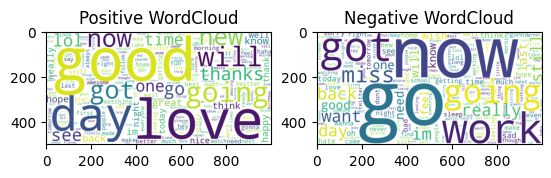

In [37]:
plt.subplot(1, 2, 1)
plt.title('Positive WordCloud')
plt.imshow(pos_wordcloud)
plt.subplot(1, 2, 2)
plt.title('Negative WordCloud')
plt.imshow(neg_wordcloud)
plt.show()